In [285]:
import pandas as pd

In [286]:
#tours csv dataframe
tours = pd.read_csv('/Users/barry/n3xtcoder/data/24-04-24/Tour.csv')

In [287]:
#complaints csv dataframe
complaints = pd.read_csv('data/24-04-24/Reklamationen.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23766/3590055005.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints = pd.read_csv('data/24-04-24/Reklamationen.csv')


In [288]:
pd.set_option('display.max_columns', None)

In [289]:
len(tours)

138953

In [290]:
#there is a fair few duplicates to get rid of
tours = tours.drop_duplicates()

In [291]:
len(tours)

95349

In [292]:
#these are not full duplicates. We're only interested in the complaint reason 901. If this happens all subsequent tasks on 
#that tour also get marked with this reason. We're only interested in the first instance of this reason.
complaints = complaints.drop_duplicates(subset='%TOURNR', keep='first')

In [293]:
#isolating the 901 reason 'Tour nicht geschafft'
complaints = complaints[complaints.Reklamationsgrund == 901.0]

In [294]:
complaints.head()

,%TOURNR,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
100,163663,A240916831,901,Tour nicht geschafft,Tourüberlastung
682,166324,A241175733,901,Tour nicht geschafft,Fahrzeugausfall
725,121217,A241176514,901,Tour nicht geschafft,Tourüberlastung
750,166005,A241185159,901,Tour nicht geschafft,Tourüberlastung
753,121221,A241185282,901,Tour nicht geschafft,Tourüberlastung


In [295]:
tours.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335


In [296]:
#i'm doing a left join here. This means all tours are kept and only the complaints that match are added to the dataframe.
tours_join_complaints = pd.merge(tours, complaints, on='%TOURNR', how='left')

In [297]:
tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0].head(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
358,14094,27.12.2023,MONU,1,TP00335,A234530422,901.0,Tour nicht geschafft,Zeitarbeiterproblem
367,18690,15.04.2021,MONU,1,TP00335,A211251520,901.0,Tour nicht geschafft,NaN
1360,39368,30.06.2022,MONU,2,TP00336,A222253580,901.0,Tour nicht geschafft,Tourüberlastung
1522,25310,04.12.2023,MONU,2,TP00336,A234247715,901.0,Tour nicht geschafft,Fahrzeugausfall
2720,59206,14.10.2021,MONU,4,TP00342,A213546939,901.0,Tour nicht geschafft,NaN
3085,66775,02.11.2022,MONU,4,TP00342,A223849279,901.0,Tour nicht geschafft,Fahrzeugausfall
4962,12752,04.12.2023,MONU,7,TP00349,A234245724,901.0,Tour nicht geschafft,Fahrzeugausfall
5309,95306,06.12.2023,MONU,7,TP00349,A234290562,901.0,Tour nicht geschafft,Zeitarbeiterproblem
5444,34449,08.11.2021,MONU,7,TP00349,A213816212,901.0,Tour nicht geschafft,NaN
5671,31297,20.06.2022,MONU,8,TP00401,A222105779,901.0,Tour nicht geschafft,Fahrzeugausfall


In [298]:
len(tours)

95349

In [299]:
#double checking that the len of tours_join_complaints is the same as the original tours dataframe
len(tours_join_complaints)

95349

In [300]:
#to get a sense of how many complaints of 'tour nicht geschafft' there are
tours_join_complaints.Reklamationsgrund.value_counts()

Reklamationsgrund
901.0    1233
Name: count, dtype: int64

In [301]:
len(tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0])

1233

In [302]:
#this is the percentage of tours that ARE successfully completed. The amount which are 'unsuccessful' is the inverse of this. 1.13%
(len(tours_join_complaints)-len(tours_join_complaints[tours_join_complaints.Reklamationsgrund == 901.0]))/len(tours_join_complaints) *100

98.70685586634364

In [303]:
#this is an aside to just double check that w're not missing any complaints that might be relevant to our analysis
complaints2 = pd.read_csv('data/24-04-24/Reklamationen.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23766/1281685158.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints2 = pd.read_csv('data/24-04-24/Reklamationen.csv')


In [304]:
complaints2.Grund.unique()

array(['BB Deckel beschädigt', 'Ü Ladestelle beräumt',
       'VSS Schlüssel/Code erforderlich',
       'NB nicht bereitgestellter Behälter', 'TV Transportweg versperrt',
       'CT/AK Container/Mulde  defekt',
       'Leerung ist erfolgt - Foto erstellt',
       'Freilaufender Hund - GS nicht betreten',
       'Standort für Behälter unklar', 'TB Transportweg Baustelle',
       'VS kein Schlüssel erforderlich', 'Tour nicht geschafft',
       'Behälter zu schwer', 'RC Behälter vermüllt', 'BB Rad beschädigt',
       'VST Tresorproblem', 'leerer Behälter - 0 Menge -',
       'Ü nur Behälter geladen', 'Z3 Schloss fehlt od. defekt',
       'Behälter-Rumpf defekt', 'BB Zapfen beschädigt',
       'VB Verdreckter Behälter', 'Behälter zuviel',
       'LV Ladestelle vermüllt', 'Ü Erhöhung erforderlich',
       'Rattenbefall - keine Leerung', 'Fahrstuhl defekt', 'Fremdtonne',
       'Behälter in Schüttung gefallen', 'Brenner - Behälter beschädigt',
       'CT/AK - Leerfahrt', 'Fahrzeugausfall/Fah

In [305]:
tours_join_complaints.Reklamationsgrund.unique()

array([ nan, 901.])

In [306]:
# a random sample of the tours. the successful tours are marked with NaN
tours_join_complaints.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung
54963,95135,24.08.2023,MONU,84,TM00001,NaN,NaN,NaN,NaN
26762,39691,05.07.2022,MONU,41,TG00037,NaN,NaN,NaN,NaN
53846,11112,24.11.2023,MONU,82,TG00023,NaN,NaN,NaN,NaN
84863,11216,23.11.2023,MONU,126,TCT0008,NaN,NaN,NaN,NaN
31314,62286,17.08.2022,MONU,47,TM00008,A222852903,901.0,Tour nicht geschafft,Tourüberlastung
82309,82838,07.03.2023,MONU,122,TCT0003,NaN,NaN,NaN,NaN
21731,80011,16.03.2023,MONU,34,TG00021,NaN,NaN,NaN,NaN
798,46900,27.09.2021,MONU,1,TP00335,NaN,NaN,NaN,NaN
42851,54954,17.08.2021,MONU,66,TT00006,NaN,NaN,NaN,NaN
54191,65595,04.10.2022,MONU,83,TG00025,NaN,NaN,NaN,NaN


In [307]:
#this is the CSV related to employees. how many there are, if thye are 'Zeitarbeiter' and if the tour had the main driver
resources = pd.read_csv('data/24-04-24/Ressource.csv')

In [308]:
#a tour can have multiple employees. Thus a tour can have multiple rows in the resources dataframe.
#I'm grouping by the tour number and counting the number of employees on each tour by counting the number of rows.
exmployee_count = resources.groupby('%TOURNR').count().reset_index()[['%TOURNR', '%Mitarbeiternummer']]

In [309]:
#here we want to do a similar groupby but instead of counting the rows we are summing the values.
#if a row has a 1 in the zeit arbieter flag and the same tour has another row, meaning another mitarbeiter, who also has this one
#that means we have 2 Zeitarbeiters - similar logic for the 'Ressource.Erster Fahrer' column
summed_employee_flags = resources.groupby('%TOURNR').sum().reset_index()[['%TOURNR', 'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer']]

In [310]:
#Join those two tables to get the 'counted' employees and the 'summed' zeitarbeiter and main driver
processed_employees = pd.merge(exmployee_count, summed_employee_flags, on='%TOURNR', how='inner')

In [311]:
processed_employees = processed_employees.rename(columns={'%Mitarbeiternummer': 'employee_count'})

In [312]:
#employee_count = resources.groupby('%TOURNR').count()

In [313]:
processed_employees.sample(20)

,%TOURNR,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer
151815,151845,2,0,1
59982,59995,2,0,1
159528,159558,2,0,1
22101,22105,2,1,1
43764,43774,2,0,1
119152,119182,2,1,1
124101,124131,2,0,1
70897,70912,2,0,1
20432,20436,2,1,0
32433,32440,2,1,1


In [314]:
#now join that table to my combined tours/complaints table
tours_join_complaints_employees = pd.merge(tours_join_complaints, processed_employees, on='%TOURNR', how='left')

In [315]:
tours_join_complaints_employees.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,12964,10.11.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0
1,38897,07.02.2022,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
2,73190,21.10.2022,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
3,54020,06.08.2021,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,1.0,1.0
4,78256,27.01.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0


In [316]:
#lets add in my tasks table
tasks = pd.read_csv('data/24-04-24/Auftr„ge.csv')

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_23766/1245601721.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tasks = pd.read_csv('data/24-04-24/Auftr„ge.csv')


In [317]:
tasks = tasks.drop_duplicates()


In [318]:
#A tour can have many tasks in it. I want to see how many each Tour has and then join that to my main table

number_of_tasks = tasks.groupby('%TOURNR').count().reset_index()[['%TOURNR','Artikel']]

In [319]:
#The tours have more tasks that i expected. The column is called 'Artikel' but that is arbitrary, i needed a column to keep the tally.
#I'll change the name shortly
number_of_tasks.head()

,%TOURNR,Artikel
0,1,182
1,2,152
2,3,152
3,4,170
4,5,151


In [320]:
#lets add this tasks count to teh main table
tours_join_complaints_employees_taskcoount = pd.merge(tours_join_complaints_employees, number_of_tasks, on='%TOURNR', how='left')

In [321]:
#lets rename the Article column to task_count to keep track of it
tours_join_complaints_employees_taskcoount = tours_join_complaints_employees_taskcoount.rename(columns={'Artikel': 'task_count'})

In [322]:
#lets have a look at a random sample of 20 to see if its being as we expect it to be
tours_join_complaints_employees_taskcoount.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count
47618,78169,27.01.2023,MONU,72,TP00211,NaN,NaN,NaN,NaN,2.0,0.0,1.0,170.0
83827,55957,16.11.2021,MONU,124,TCT0005,NaN,NaN,NaN,NaN,1.0,0.0,1.0,3.0
36074,64441,09.09.2022,MONU,54,TP00116,NaN,NaN,NaN,NaN,2.0,1.0,1.0,280.0
89512,72959,19.10.2022,MONU,134,TP00346,NaN,NaN,NaN,NaN,2.0,0.0,1.0,155.0
9504,79864,14.03.2023,MONU,13,TP00122,NaN,NaN,NaN,NaN,2.0,1.0,1.0,114.0
5366,4301,03.04.2023,MONU,7,TP00349,NaN,NaN,NaN,NaN,3.0,1.0,1.0,192.0
92395,7322,28.08.2023,MONU,144,TT00BG02,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN
60935,55671,11.11.2021,MONU,92,TP00216,NaN,NaN,NaN,NaN,2.0,0.0,1.0,150.0
88798,71634,19.09.2022,MONU,133,TP00577,NaN,NaN,NaN,NaN,2.0,0.0,1.0,4.0
67433,36090,02.12.2021,MONU,100,TP00215,NaN,NaN,NaN,NaN,2.0,0.0,1.0,137.0


In [323]:
#double checking what the tours CSV was like
tours.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335
1,38897,07.02.2022,MONU,1,TP00335
2,73190,21.10.2022,MONU,1,TP00335
3,54020,06.08.2021,MONU,1,TP00335
4,78256,27.01.2023,MONU,1,TP00335


In [324]:
#My understaind is that every time the truck leaves it gets a unique 'tourNr'. If this route is a regular route it gets a 
#Rahmentour number as well. To keep track of how many tours are in each Rahmentour i'm going to group by that column and count
#Rahmentour with number 3 occurred 801 times
tours.groupby('%Rahmentour').count()

,%TOURNR,Einsatzdatum,Betriebsstätte,Rahmentourcode
%Rahmentour,,,,
1,800,800,800,800
2,790,790,790,790
3,801,801,801,801
4,785,785,785,785
5,781,781,781,781
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1


In [325]:
#there is some surprise at the number of tasks in a tour. This is to isolate it for one tour, 6276 and to double check that the 
#count/summing above is correct... It appears to be. The TOURNR is the same, all on the one date, with unique Auftr.Auftragsnr for each 
#task and a changing %DEBITOR%EINSATZSTELLE for each pick up location
tasks[tasks['%TOURNR'] == 6276]

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
2350808,6276,6477,A233037454,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493451,6276,55846,A233051474,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493488,6276,83418,A233051615,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
2493532,6276,83417,A233051612,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
3357645,6276,44250,A233049476,31.08.2023,1,Stück,10100.0,M501400,Glas weiß Duales System,1100 L MGB
...,...,...,...,...,...,...,...,...,...,...
7619821,6276,89146,A233035750,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7619858,6276,6075,A233035795,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7620163,6276,36851,A233034779,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB
7620690,6276,50790,A233023465,31.08.2023,1,Stück,10040.0,M501400,Glas weiß Duales System,240 L MGB


In [326]:
#NOTE for tomorrow - I want work out the average number of tasks for each rahmen tour to see if the number of tasks is a factor in
#the success of the tour. I also want to see if the number of employees is a factor in the success of the tour. Possiblying having a
# column that shows if the tour had more or less or the average number of employees for that tour.

In [327]:
tours.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,12964,10.11.2023,MONU,1,TP00335


In [328]:
resources.head(1)

,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer
0,95350,1,0,1


In [329]:
resources_tours = pd.merge(resources, tours, on='%TOURNR', how='inner')

In [330]:
resources_tours.head(20)

,%TOURNR,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode
0,1,278,0,1,22.08.2023,MONU,1,TP00335
1,1,279,0,0,22.08.2023,MONU,1,TP00335
2,2,280,0,1,22.08.2023,MONU,2,TP00336
3,2,281,1,0,22.08.2023,MONU,2,TP00336
4,3,239,0,1,22.08.2023,MONU,3,TP00337
5,3,282,1,0,22.08.2023,MONU,3,TP00337
6,4,283,0,1,22.08.2023,MONU,4,TP00342
7,4,284,1,0,22.08.2023,MONU,4,TP00342
8,5,285,0,1,22.08.2023,MONU,5,TP00343
9,5,286,0,0,22.08.2023,MONU,5,TP00343


In [331]:
grouped = resources_tours.groupby(['%TOURNR', '%Rahmentour']).count().reset_index()

In [332]:
grouped.head()

,%TOURNR,%Rahmentour,%Mitarbeiternummer,Zeitarbeiter_Flag,Ressource.Erster Fahrer,Einsatzdatum,Betriebsstätte,Rahmentourcode
0,1,1,2,2,2,2,2,2
1,2,2,2,2,2,2,2,2
2,3,3,2,2,2,2,2,2
3,4,4,2,2,2,2,2,2
4,5,5,2,2,2,2,2,2


In [333]:
sorted_grouped = grouped.sort_values(by='%Rahmentour')

In [334]:
sorted_grouped = sorted_grouped[['%TOURNR','%Rahmentour','%Mitarbeiternummer']]

In [335]:
sorted_grouped = sorted_grouped.rename(columns={'%Mitarbeiternummer': 'employee_count'})

In [336]:
sorted_grouped.head(20)

,%TOURNR,%Rahmentour,employee_count
0,1,1,2
80644,80659,1,3
80570,80585,1,3
30456,30463,1,2
57410,57423,1,2
30342,30349,1,2
1157,1158,1,2
57163,57176,1,2
80401,80416,1,2
80319,80334,1,3


In [337]:
average_employee_count = sorted_grouped.groupby('%Rahmentour')['employee_count'].mean().reset_index()

In [338]:
average_employee_count

,%Rahmentour,employee_count
0,1,2.226250
1,2,2.149367
2,3,2.131086
3,4,2.095541
4,5,2.153649
...,...,...
194,195,1.000000
195,196,2.000000
196,197,4.000000
197,198,2.000000


In [339]:
everything_table = pd.merge(tours_join_complaints_employees_taskcoount, average_employee_count, on = '%Rahmentour', how = 'inner' )

In [340]:
everything_table = everything_table.rename(columns={'employee_count_x': 'employee_count', 'employee_count_y': 'average_employee_count'})

In [341]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
7229,29538,05.05.2021,MONU,10,TP00500,NaN,NaN,NaN,NaN,2.0,1.0,1.0,64.0,2.053503
36068,34722,10.11.2021,MONU,54,TP00116,NaN,NaN,NaN,NaN,2.0,0.0,1.0,215.0,2.116308
7639,83194,05.06.2023,MONU,10,TP00500,NaN,NaN,NaN,NaN,2.0,0.0,1.0,49.0,2.053503
77740,81440,06.04.2023,MONU,114,TP00431,NaN,NaN,NaN,NaN,5.0,1.0,1.0,266.0,3.357143
87068,84790,08.02.2023,MONU,130,TP00325,NaN,NaN,NaN,NaN,2.0,0.0,1.0,212.0,2.147395
58254,15593,22.03.2021,MONU,88,TP00118,NaN,NaN,NaN,NaN,3.0,1.0,1.0,358.0,2.357500
20278,22695,29.03.2022,MONU,32,TG00014,NaN,NaN,NaN,NaN,2.0,0.0,1.0,213.0,2.043328
9083,12131,04.12.2023,MONU,12,TP00422,NaN,NaN,NaN,NaN,2.0,1.0,1.0,117.0,2.133903
35899,51567,04.06.2021,MONU,54,TP00116,NaN,NaN,NaN,NaN,2.0,1.0,1.0,169.0,2.116308
11615,84388,15.02.2023,MONU,17,TP00222,NaN,NaN,NaN,NaN,2.0,0.0,1.0,180.0,2.223108


In [342]:
everything_table[everything_table.Rahmentourcode == 'TP00433']

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
10458,64927,07.09.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,2.262895
10459,34981,22.11.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,0.0,1.0,159.0,2.262895
10460,11200,16.11.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,2.0,1.0,149.0,2.262895
10461,27513,26.04.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,134.0,2.262895
10462,79764,13.03.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,237.0,2.262895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,32179,16.05.2022,MONU,15,TP00433,NaN,NaN,NaN,NaN,3.0,1.0,1.0,164.0,2.262895
11055,59879,25.10.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,160.0,2.262895
11056,33768,29.10.2021,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,1.0,1.0,141.0,2.262895
11057,77914,16.02.2023,MONU,15,TP00433,NaN,NaN,NaN,NaN,2.0,0.0,1.0,173.0,2.262895


#I want to add tour times

In [343]:
tour_times = pd.read_csv('data/24-04-24/Tour_times.csv')

In [344]:
tour_times.head(1)

,%TOURNR,Einsatzdatum,Startuhrzeit,Endeuhrzeit,Ausgangspunkt
0,50486,02.01.2021,00:00:00,00:00:00,NaN


In [345]:
everything_table.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count
0,12964,10.11.2023,MONU,1,TP00335,NaN,NaN,NaN,NaN,2.0,0.0,1.0,149.0,2.22625


In [346]:
everything_table = pd.merge(everything_table, tour_times, on=['%TOURNR', 'Einsatzdatum'], how='inner')

In [347]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt
82319,93493,21.12.2022,MONU,122,TCT0003,NaN,NaN,NaN,NaN,1.0,0.0,1.0,6.0,1.001592,00:00:00,00:00:00,BR_WESTH
30699,81026,30.03.2023,MONU,46,TM00007,NaN,NaN,NaN,NaN,2.0,0.0,1.0,47.0,2.083014,05:08:19,13:25:27,BR_MONU
23792,64039,06.09.2022,MONU,37,TG00031,NaN,NaN,NaN,NaN,2.0,0.0,1.0,204.0,2.075899,05:30:25,13:21:49,BR_WESTH
53667,52068,11.06.2021,MONU,82,TG00023,NaN,NaN,NaN,NaN,3.0,0.0,1.0,154.0,2.165563,05:10:44,13:03:40,NaN
85678,30245,05.05.2022,MONU,127,TCT0009,NaN,NaN,NaN,NaN,1.0,0.0,1.0,6.0,1.004286,00:00:00,00:00:00,NaN
57296,36895,17.01.2022,MONU,87,TM00012,NaN,NaN,NaN,NaN,2.0,1.0,1.0,43.0,2.135787,05:33:09,13:26:04,NaN
71412,22975,31.03.2022,MONU,105,TP00319,NaN,NaN,NaN,NaN,2.0,1.0,1.0,227.0,2.274235,05:51:44,13:27:10,NaN
70094,71035,03.06.2022,MONU,103,TP00317,NaN,NaN,NaN,NaN,3.0,1.0,1.0,225.0,2.224490,08:06:44,14:24:10,NaN
87822,34403,04.11.2021,MONU,131,TP00328,NaN,NaN,NaN,NaN,3.0,0.0,1.0,198.0,2.128750,05:30:10,15:58:04,NaN
10431,37578,24.01.2022,MONU,14,TP00221,NaN,NaN,NaN,NaN,2.0,0.0,1.0,123.0,2.085890,05:26:24,13:30:13,NaN


In [348]:
everything_table.Einsatzdatum = pd.to_datetime(everything_table.Einsatzdatum, format="%d.%m.%Y")

In [349]:
everything_table['year'] = everything_table.Einsatzdatum.dt.year

In [350]:
everything_table['month'] = everything_table.Einsatzdatum.dt.month_name()
everything_table['month_number'] = everything_table.Einsatzdatum.dt.month
everything_table['day'] = everything_table.Einsatzdatum.dt.day_name()
everything_table['day_number'] = everything_table.Einsatzdatum.dt.day



In [351]:
everything_table['rubbish_type'] = everything_table['Rahmentourcode'].str.extract(r'(\D+)')

In [352]:
rahmehentour_values = everything_table['%Rahmentour'].value_counts().to_list()

In [353]:
rahmentourcode_values = everything_table['Rahmentourcode'].value_counts().to_list()

In [354]:
if rahmehentour_values == rahmentourcode_values:
    print('They are the same')

They are the same


In [355]:
everything_table.to_pickle('data/24-04-24/everything_table.pkl')

In [356]:
everything_table[everything_table['Rahmentourcode'] == 'TP00334']

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
49229,53068,2021-06-22,MONU,75,TP00334,NaN,NaN,NaN,NaN,3.0,1.0,1.0,412.0,4.298526,05:42:50,14:32:41,NaN,2021,June,6,Tuesday,22,TP
49230,87822,2023-08-22,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,259.0,4.298526,06:02:44,13:21:37,BR_RUDOWER,2023,August,8,Tuesday,22,TP
49231,4738,2023-06-08,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,352.0,4.298526,05:56:51,14:12:10,BR_RUDOWER,2023,June,6,Thursday,8,TP
49232,77255,2023-08-08,MONU,75,TP00334,NaN,NaN,NaN,NaN,5.0,3.0,1.0,259.0,4.298526,06:17:45,12:48:49,BR_RUDOWER,2023,August,8,Tuesday,8,TP
49233,81435,2023-04-06,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,346.0,4.298526,06:00:02,13:51:13,BR_RUDOWER,2023,April,4,Thursday,6,TP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50038,82001,2023-03-01,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,280.0,4.298526,05:36:21,13:14:50,BR_RUDOWER,2023,March,3,Wednesday,1,TP
50039,79431,2023-02-23,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,5.0,1.0,359.0,4.298526,07:03:26,14:16:20,BR_NOBEL,2023,February,2,Thursday,23,TP
50040,53732,2021-08-25,MONU,75,TP00334,NaN,NaN,NaN,NaN,2.0,1.0,1.0,318.0,4.298526,05:43:52,14:39:10,NaN,2021,August,8,Wednesday,25,TP
50041,8569,2023-10-09,MONU,75,TP00334,NaN,NaN,NaN,NaN,5.0,3.0,1.0,415.0,4.298526,05:43:58,14:12:42,BR_RUDOWER,2023,October,10,Monday,9,TP


In [357]:
len(tasks)

13242155

In [358]:
tasks = tasks.drop_duplicates()
len(tasks)

13242155

In [359]:
tasks.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [360]:
everything_table[everything_table['%TOURNR'] == 82001]

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
50038,82001,2023-03-01,MONU,75,TP00334,NaN,NaN,NaN,NaN,6.0,4.0,1.0,280.0,4.298526,05:36:21,13:14:50,BR_RUDOWER,2023,March,3,Wednesday,1,TP


In [361]:
tasks[tasks['%TOURNR'] == 82001]

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
379407,82001,27325,A230752989,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
379429,82001,3572,A230746052,01.03.2023,2,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972480,82001,41169,A230754343,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972681,82001,21720,A230752529,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
1972778,82001,82882,A230756594,01.03.2023,1,Stück,10100.0,M610200,"5.01 Altpapier, gemischt",1100 L MGB
...,...,...,...,...,...,...,...,...,...,...
9703594,82001,63870,A230748717,01.03.2023,3,Stück,10040.0,M610200,"5.01 Altpapier, gemischt",240 L MGB
13140698,82001,20643,A230752418,01.03.2023,1,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB
13141334,82001,33085,A230753332,01.03.2023,3,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB
13141462,82001,40967,A230755410,01.03.2023,1,Stück,10060.0,M610200,"5.01 Altpapier, gemischt",360 L MGB


In [362]:
tasks_copy  = tasks.copy()

In [363]:
rahmentour_code = everything_table[['%TOURNR','Rahmentourcode']]

In [364]:
tasks.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen


In [365]:
# original
tasks_copy = pd.merge(tasks_copy, rahmentour_code, on='%TOURNR', how='left')

# tasks_copy = pd.merge(tasks_copy, rahmentour_code, on='%TOURNR', how='inner')

In [366]:
tasks_copy.head()

,%TOURNR,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel,Rahmentourcode
0,32437,56418,A221790082,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014
1,32437,56418,A221790083,19.05.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014
2,82408,56418,A231849217,23.05.2023,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0004
3,46532,56418,A213241021,21.09.2021,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0004
4,25173,56418,A220934859,15.03.2022,1,Stück,20440.0,M760300,Kunststoffe,30m³ CT offen,TCT0014


In [367]:
tasks_copy2 = tasks_copy.groupby(['%TOURNR', 'Rahmentourcode']).count().reset_index()

In [368]:
tasks_copy2.head()

,%TOURNR,Rahmentourcode,%DEBITOR%EINSATZSTELLE,Auftr.Auftragsnr.,Auftr.Einsatzdatum,Auftr.Menge,Auftr.Einheit,Auftr.Betriebsmittelnr.,Auftr.Int. Stoffkatalog,Artikel,Betriebsmittel
0,1,TP00335,182,182,182,182,182,182,182,182,182
1,2,TP00336,152,152,152,152,152,152,152,152,152
2,3,TP00337,152,152,152,152,152,152,152,152,152
3,4,TP00342,170,170,170,170,170,170,170,170,170
4,5,TP00343,151,151,151,151,151,151,151,151,151


In [369]:
tasks_copy2_group = tasks_copy2.groupby('Rahmentourcode')['Artikel'].mean().reset_index()

In [370]:
tasks_copy2_group = tasks_copy2_group.rename(columns={'Artikel': 'average_tasks'})

In [371]:
tasks_copy2_group.sort_values(by='average_tasks', ascending=False)

,Rahmentourcode,average_tasks
146,TP00334,346.202771
131,TP00318,307.929577
141,TP00329,284.872340
107,TP00118,276.418043
130,TP00317,263.078105
...,...,...
182,TSL0001,0.800000
29,TCTWBS005,0.750000
192,TT00009,0.700000
8,TAKWBS006,0.000000


In [372]:
everything_table.sample(10)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsgrund,Grund,Reklamationsuntergrund Beschreibung,employee_count,Zeitarbeiter_Flag,Ressource.Erster Fahrer,task_count,average_employee_count,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type
69584,34486,2023-11-14,MONU,103,TP00317,NaN,NaN,NaN,NaN,2.0,0.0,1.0,209.0,2.224490,04:23:51,15:14:08,BR_MONU,2023,November,11,Tuesday,14,TP
37461,61190,2022-07-20,MONU,57,TG00692,NaN,NaN,NaN,NaN,2.0,0.0,1.0,113.0,2.035714,05:21:02,13:03:44,BR_WESTH,2022,July,7,Wednesday,20,TG
33721,84976,2023-06-21,MONU,50,TGIGLU0711,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.126050,06:10:13,11:38:44,BR_WESTH,2023,June,6,Wednesday,21,TGIGLU
59597,9076,2023-10-07,MONU,90,TP00212,NaN,NaN,NaN,NaN,2.0,0.0,1.0,152.0,2.182048,05:32:50,13:32:24,BR_HULT,2023,October,10,Saturday,7,TP
94851,41921,2021-07-01,MONU,171,TP00301,NaN,NaN,NaN,NaN,2.0,0.0,1.0,97.0,2.111675,05:42:04,14:30:39,NaN,2021,July,7,Thursday,1,TP
20493,1898,2023-03-07,MONU,32,TG00014,NaN,NaN,NaN,NaN,3.0,2.0,1.0,216.0,2.043328,05:13:21,13:06:31,BR_WESTH,2023,March,3,Tuesday,7,TG
18338,67684,2022-11-18,MONU,29,TCT0016,NaN,NaN,NaN,NaN,2.0,1.0,1.0,3.0,1.715302,00:00:00,00:00:00,BR_WESTH,2022,November,11,Friday,18,TCT
2986,54823,2021-08-18,MONU,4,TP00342,NaN,NaN,NaN,NaN,2.0,1.0,1.0,191.0,2.095541,05:18:37,13:34:52,NaN,2021,August,8,Wednesday,18,TP
81371,68321,2022-11-25,MONU,120,TAK0001,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.052098,00:00:00,00:00:00,NaN,2022,November,11,Friday,25,TAK
5231,2351,2023-03-27,MONU,7,TP00349,NaN,NaN,NaN,NaN,3.0,0.0,1.0,170.0,2.021601,00:00:00,00:00:00,BR_MONU,2023,March,3,Monday,27,TP


In [373]:
everything_table = pd.merge(everything_table, tasks_copy2_group, on='Rahmentourcode', how='left')

In [374]:
everything_table.columns

Index(['%TOURNR', 'Einsatzdatum', 'Betriebsstätte', '%Rahmentour',
       'Rahmentourcode', 'Belegnr.', 'Reklamationsgrund', 'Grund',
       'Reklamationsuntergrund Beschreibung', 'employee_count',
       'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer', 'task_count',
       'average_employee_count', 'Startuhrzeit', 'Endeuhrzeit',
       'Ausgangspunkt', 'year', 'month', 'month_number', 'day', 'day_number',
       'rubbish_type', 'average_tasks'],
      dtype='object')

In [375]:
everything_table = everything_table[['%TOURNR',
                            'Einsatzdatum',
                            'Betriebsstätte',
                            '%Rahmentour',
                            'Rahmentourcode',
                            'Belegnr.',
                            'Grund',
                            'Reklamationsuntergrund Beschreibung', 
                            'Startuhrzeit',
                            'Endeuhrzeit',
                            'Ausgangspunkt',
                            'year',
                            'month',
                            'month_number',
                            'day',
                            'day_number',
                            'rubbish_type',
                            'Zeitarbeiter_Flag',
                            'Ressource.Erster Fahrer', 
                            'employee_count',
                            'average_employee_count',
                            'average_tasks',
                            'task_count',
                            'Reklamationsgrund']]

In [376]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
48852,90102,2023-04-21,MONU,74,TP00332,NaN,NaN,NaN,05:22:04,13:23:58,BR_RUDOWER,2023,April,4,Friday,21,TP,1.0,1.0,3.0,2.255668,197.693774,89.0,NaN
3441,6322,2023-07-10,MONU,5,TP00343,NaN,NaN,NaN,05:27:26,14:48:00,BR_MONU,2023,July,7,Monday,10,TP,0.0,1.0,2.0,2.153649,147.905006,167.0,NaN
76635,84146,2023-07-14,MONU,112,TP00600-DW,NaN,NaN,NaN,05:51:26,12:49:33,BR_MONU,2023,July,7,Friday,14,TP,1.0,1.0,2.0,2.160167,143.330544,171.0,NaN
70951,93004,2022-12-14,MONU,104,TP00318,NaN,NaN,NaN,05:04:09,15:25:08,BR_MONU,2022,December,12,Wednesday,14,TP,1.0,1.0,3.0,2.243278,307.929577,317.0,NaN
10851,66915,2022-11-03,MONU,15,TP00433,NaN,NaN,NaN,06:01:24,13:42:24,BR_NOBEL,2022,November,11,Thursday,3,TP,0.0,1.0,2.0,2.262895,172.535473,187.0,NaN
39542,88991,2023-11-23,MONU,61,TT00002,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,November,11,Thursday,23,TT,1.0,1.0,2.0,1.887671,24.987517,27.0,NaN
22789,61444,2022-07-22,MONU,35,TG00022,NaN,NaN,NaN,05:16:00,12:48:35,BR_WESTH,2022,July,7,Friday,22,TG,1.0,1.0,2.0,2.077632,143.213720,36.0,NaN
23526,1901,2023-03-07,MONU,36,TG00030,NaN,NaN,NaN,05:45:39,13:31:52,BR_WESTH,2023,March,3,Tuesday,7,TG,0.0,1.0,2.0,2.087649,149.538770,138.0,NaN
44090,78226,2023-01-27,MONU,68,TP00113,NaN,NaN,NaN,05:54:03,14:09:17,BR_LENG,2023,January,1,Friday,27,TP,1.0,1.0,2.0,2.153074,180.484076,199.0,NaN
27384,63006,2022-08-25,MONU,42,TG00041,NaN,NaN,NaN,05:51:37,13:26:19,BR_WESTH,2022,August,8,Thursday,25,TG,0.0,1.0,2.0,2.096774,155.679061,146.0,NaN


I want to have a binary column to hold wheter its Raklamation code == 901.0

In [377]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
0,12964,2023-11-10,MONU,1,TP00335,NaN,NaN,NaN,05:37:11,13:08:06,BR_RUDOWER,2023,November,11,Friday,10,TP,0.0,1.0,2.0,2.22625,164.097592,149.0,NaN
1,38897,2022-02-07,MONU,1,TP00335,NaN,NaN,NaN,05:24:19,13:51:36,NaN,2022,February,2,Monday,7,TP,1.0,1.0,2.0,2.22625,164.097592,153.0,NaN
2,73190,2022-10-21,MONU,1,TP00335,NaN,NaN,NaN,05:17:54,13:47:48,BR_NOBEL,2022,October,10,Friday,21,TP,1.0,1.0,2.0,2.22625,164.097592,144.0,NaN
3,54020,2021-08-06,MONU,1,TP00335,NaN,NaN,NaN,05:22:22,15:59:07,NaN,2021,August,8,Friday,6,TP,1.0,1.0,2.0,2.22625,164.097592,175.0,NaN
4,78256,2023-01-27,MONU,1,TP00335,NaN,NaN,NaN,05:24:08,13:32:08,BR_NOBEL,2023,January,1,Friday,27,TP,0.0,1.0,2.0,2.22625,164.097592,143.0,NaN


In [378]:
everything_table[(everything_table['Rahmentourcode'] == 'TG00031') & (everything_table['%TOURNR'] == 62050)]

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN


In [379]:
everything_table.sort_values(by='task_count', ascending=False).head(40)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN
21331,74716,2022-08-09,MONU,34,TG00021,NaN,NaN,NaN,05:40:29,13:42:39,BR_WESTH,2022,August,8,Tuesday,9,TG,1.0,1.0,3.0,2.087533,177.057257,1229.0,NaN
24189,75054,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,1132.0,NaN
22263,62275,2022-08-17,MONU,35,TG00022,NaN,NaN,NaN,12:51:46,13:41:42,BR_WESTH,2022,August,8,Wednesday,17,TG,0.0,1.0,2.0,2.077632,143.213720,1107.0,NaN
42786,68830,2022-02-09,MONU,66,TT00006,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2022,February,2,Wednesday,9,TT,0.0,1.0,2.0,1.887179,28.490741,1081.0,NaN
22205,62161,2022-08-16,MONU,35,TG00022,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Tuesday,16,TG,0.0,1.0,2.0,2.077632,143.213720,1053.0,NaN
22391,62605,2022-08-22,MONU,35,TG00022,NaN,NaN,NaN,05:21:20,13:29:39,BR_WESTH,2022,August,8,Monday,22,TG,0.0,1.0,2.0,2.077632,143.213720,1041.0,NaN
22208,62514,2022-08-19,MONU,35,TG00022,NaN,NaN,NaN,05:24:01,13:26:42,BR_WESTH,2022,August,8,Friday,19,TG,0.0,1.0,2.0,2.077632,143.213720,1007.0,NaN
22840,62162,2022-08-16,MONU,36,TG00030,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Tuesday,16,TG,0.0,1.0,2.0,2.087649,149.538770,974.0,NaN
15452,20739,2021-05-28,MONU,24,TG00024,NaN,NaN,NaN,05:27:08,10:15:35,NaN,2021,May,5,Friday,28,TG,0.0,1.0,2.0,2.147059,214.981132,964.0,NaN


In [380]:
everything_table[everything_table.Rahmentourcode == 'TG00031'].sort_values(by='task_count', ascending=False)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
23991,62050,2022-08-15,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Monday,15,TG,0.0,1.0,2.0,2.075899,174.530201,2058.0,NaN
24189,75054,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,1132.0,NaN
24130,44026,2021-07-29,MONU,37,TG00031,NaN,NaN,NaN,05:54:27,13:37:48,NaN,2021,July,7,Thursday,29,TG,0.0,1.0,2.0,2.075899,174.530201,501.0,NaN
23843,53648,2021-08-03,MONU,37,TG00031,NaN,NaN,NaN,05:50:19,13:41:04,NaN,2021,August,8,Tuesday,3,TG,1.0,1.0,2.0,2.075899,174.530201,482.0,NaN
24137,30114,2022-05-04,MONU,37,TG00031,NaN,NaN,NaN,05:54:21,13:38:09,NaN,2022,May,5,Wednesday,4,TG,0.0,1.0,2.0,2.075899,174.530201,448.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,35741,2021-11-26,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,NaN,2021,November,11,Friday,26,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN
23900,40031,2021-02-08,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,NaN,2021,February,2,Monday,8,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN
24175,62616,2022-08-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2022,August,8,Friday,12,TG,0.0,1.0,2.0,2.075899,174.530201,NaN,NaN
24289,91832,2023-04-12,MONU,37,TG00031,NaN,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2023,April,4,Wednesday,12,TG,1.0,1.0,3.0,2.075899,174.530201,NaN,NaN


In [381]:
everything_table = everything_table.sort_values(by='Einsatzdatum', ascending=False)

In [382]:
everything_table.head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
95276,79785,2023-12-31,MONU,180,TM00100,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,December,12,Sunday,31,TM,1.0,1.0,3.0,2.6,1.916667,NaN,NaN


In [383]:
everything_table.tail(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Grund,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund
41854,50363,2021-01-02,MONU,64,TT00005,NaN,NaN,NaN,00:00:00,00:00:00,BR_MONU,2021,January,1,Saturday,2,TT,1.0,1.0,2.0,1.833333,21.410663,28.0,NaN


In [384]:
weather = pd.read_csv('data/24-04-24/weather_data.csv')

In [385]:
blah = weather.iloc[1].to_list()

In [386]:
blah

['time',
 'weather_code (wmo code)',
 'temperature_2m_mean (°C)',
 'rain_sum (mm)',
 'snowfall_sum (cm)',
 'precipitation_hours (h)']

In [387]:
weather.columns = ['Einsatzdatum',
 'weather_code (wmo code)',
 'temperature_2m_mean (°C)',
 'rain_sum (mm)',
 'snowfall_sum (cm)',
 'precipitation_hours (h)']

In [388]:
weather = weather.drop([0,1]).reset_index(drop=True)

In [389]:
weather.Einsatzdatum = pd.to_datetime(weather.Einsatzdatum, format="%Y-%m-%d")

In [390]:
everything_table = pd.merge(everything_table, weather, on='Einsatzdatum', how='left')

In [391]:
everything_table.Reklamationsgrund.unique()

array([ nan, 901.])

In [392]:
everything_table['cancelled'] = everything_table['Reklamationsgrund'].apply(lambda x: 1 if x == 901. else 0)

In [393]:
if 'Reklmationsgrund' in everything_table.columns:
    everything_table.drop(columns=['Reklamationsgrund'], inplace=True)
else:
    print('Column already dropped')

Column already dropped


In [394]:
if 'Grund' in everything_table.columns:
    everything_table.drop(columns=['Grund'], inplace=True)
    print(f'column Grund dropped')
else:
    print('Column already dropped')

column Grund dropped


In [395]:
everything_table.columns

Index(['%TOURNR', 'Einsatzdatum', 'Betriebsstätte', '%Rahmentour',
       'Rahmentourcode', 'Belegnr.', 'Reklamationsuntergrund Beschreibung',
       'Startuhrzeit', 'Endeuhrzeit', 'Ausgangspunkt', 'year', 'month',
       'month_number', 'day', 'day_number', 'rubbish_type',
       'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer', 'employee_count',
       'average_employee_count', 'average_tasks', 'task_count',
       'Reklamationsgrund', 'weather_code (wmo code)',
       'temperature_2m_mean (°C)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'precipitation_hours (h)', 'cancelled'],
      dtype='object')

In [396]:
everything_table.sample(20)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
63237,37156,2022-01-19,MONU,45,TM00006,NaN,NaN,04:46:01,13:12:51,NaN,2022,January,1,Wednesday,19,TM,0.0,1.0,2.0,2.085750,57.563291,29.0,NaN,3,3.3,0.00,0.00,0.0,0
83458,20508,2021-05-27,MONU,8,TP00401,NaN,NaN,06:02:33,13:44:14,NaN,2021,May,5,Thursday,27,TP,0.0,1.0,2.0,2.153266,170.237548,158.0,NaN,61,11.8,5.00,0.00,10.0,0
63891,36627,2022-01-12,MONU,114,TP00431,NaN,NaN,06:00:57,14:27:11,NaN,2022,January,1,Wednesday,12,TP,1.0,1.0,6.0,3.357143,261.993818,242.0,NaN,3,0.0,0.00,0.00,0.0,0
94121,11939,2021-01-15,MONU,117,TP00314,NaN,NaN,09:35:26,15:25:42,NaN,2021,January,1,Friday,15,TP,0.0,1.0,2.0,2.313776,189.311622,207.0,NaN,71,-0.9,0.00,0.28,4.0,0
12774,88109,2023-08-14,MONU,10,TP00500,NaN,NaN,05:26:51,12:45:52,BR_MONU,2023,August,8,Monday,14,TP,0.0,1.0,2.0,2.053503,55.012788,50.0,NaN,51,22.7,0.10,0.00,1.0,0
51589,71029,2022-06-03,MONU,92,TP00216,NaN,NaN,08:02:42,12:45:46,NaN,2022,June,6,Friday,3,TP,0.0,1.0,2.0,2.098750,161.133418,151.0,NaN,2,17.3,0.00,0.00,0.0,0
38350,66768,2022-11-02,MONU,73,TP00331,NaN,NaN,05:50:37,14:00:01,BR_NOBEL,2022,November,11,Wednesday,2,TP,0.0,1.0,2.0,2.323270,167.135959,147.0,NaN,51,10.2,0.40,0.00,1.0,0
66616,48051,2021-12-11,MONU,170,TP00667,NaN,NaN,00:00:00,00:00:00,NaN,2021,December,12,Saturday,11,TP,2.0,1.0,4.0,2.750000,87.912162,20.0,NaN,3,-2.1,0.00,0.00,0.0,0
77354,53969,2021-08-09,MONU,117,TP00314,NaN,NaN,05:53:26,15:41:05,NaN,2021,August,8,Monday,9,TP,0.0,1.0,2.0,2.313776,189.311622,176.0,NaN,51,18.4,0.70,0.00,5.0,0
29804,78032,2023-02-04,MONU,118,TCT0006,NaN,NaN,00:00:00,00:00:00,BR_WESTH,2023,February,2,Saturday,4,TCT,0.0,1.0,1.0,1.057762,4.453069,4.0,NaN,51,1.1,0.10,0.00,1.0,0


In [397]:
everything_table.to_csv('data/24-04-24/everything_table2.csv', index=False)

In [398]:
everything_table['Reklamationsuntergrund Beschreibung'].value_counts()

Reklamationsuntergrund Beschreibung
Tourüberlastung                608
Fahrzeug voll                   44
Fahrzeugausfall                 44
Zeitarbeiterproblem             35
Krankheitsfall auf Tour         25
Stau                            19
Witterung                       12
Straßensperren Unfall            3
Straßensperren Staatsbesuch      2
Name: count, dtype: int64

In [399]:
import matplotlib.pyplot as plt
import seaborn as sns


In [400]:
import numpy as np
from scipy.special import expit


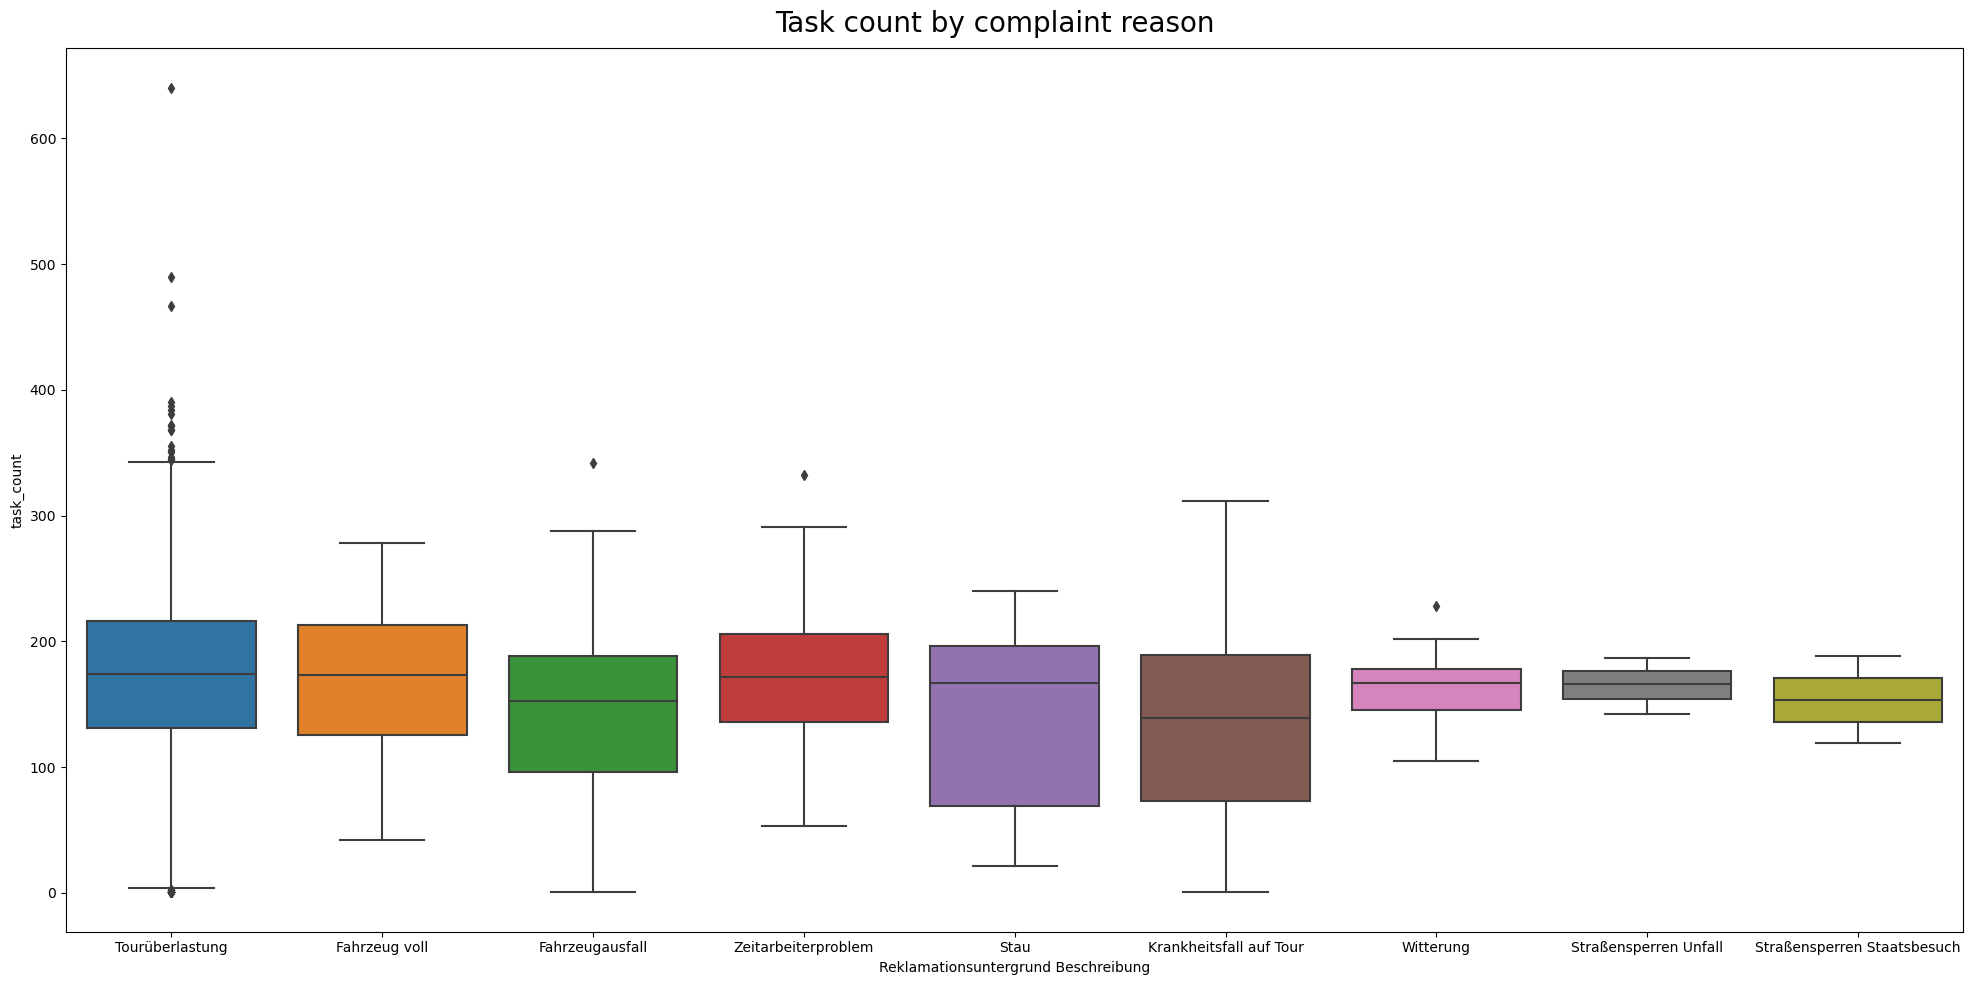

In [401]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(x='Reklamationsuntergrund Beschreibung', y='task_count', data=everything_table)
fig.suptitle('Task count by complaint reason', fontsize=20)
plt.tight_layout()

In [402]:
everything_table['temperature_2m_mean (°C)'].unique()

array(['5.5', '6.2', '8.8', '7.9', '3.7', '8.4', '9.4', '1.8', '3.1',
       '6.8', '5.4', '6.9', '6.3', '6.6', '2.7', '2.9', '4.1', '7.0',
       '2.1', '0.3', '0.2', '0.1', '-1.6', '-2.9', '-5.8', '-4.1', '-1.1',
       '-1.5', '-0.2', '1.0', '7.2', '3.9', '9.3', '4.0', '3.8', '6.4',
       '7.8', '10.7', '5.2', '5.6', '8.2', '9.0', '9.2', '10.4', '8.9',
       '9.6', '11.3', '10.1', '11.4', '12.9', '9.7', '9.5', '10.0',
       '11.6', '10.6', '7.1', '5.7', '15.2', '16.6', '15.4', '18.3',
       '13.8', '16.1', '14.3', '13.9', '14.4', '18.4', '15.8', '19.9',
       '19.1', '17.7', '20.8', '19.4', '18.5', '21.7', '19.0', '17.0',
       '16.5', '22.3', '22.8', '22.4', '22.1', '21.8', '20.9', '20.5',
       '17.9', '16.9', '15.7', '15.1', '16.3', '21.3', '23.5', '21.2',
       '21.4', '24.8', '23.1', '22.7', '24.3', '18.2', '15.9', '15.6',
       '17.8', '18.6', '19.6', '18.7', '17.4', '16.2', '16.4', '21.0',
       '20.7', '17.5', '17.1', '21.6', '26.6', '23.4', '24.1', '23.3',
       

In [403]:
everything_table['temperature_2m_mean (°C)'] = pd.to_numeric(everything_table['temperature_2m_mean (°C)'], errors='coerce').round().astype(int)

In [404]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
0,79785,2023-12-31,MONU,180,TM00100,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,December,12,Sunday,31,TM,1.0,1.0,3.0,2.600000,1.916667,NaN,NaN,61,6,1.70,0.00,4.0,0
1,12084,2023-12-30,MONU,134,TP00346,NaN,NaN,05:58:42,11:40:59,BR_MONU,2023,December,12,Saturday,30,TP,0.0,1.0,2.0,2.107831,159.131274,170.0,NaN,61,6,2.80,0.00,6.0,0
2,93972,2023-12-30,MONU,35,TG00022,A234593588,Tourüberlastung,05:18:53,13:22:40,BR_WESTH,2023,December,12,Saturday,30,TG,1.0,1.0,2.0,2.077632,143.213720,59.0,901.0,61,6,2.80,0.00,6.0,1
3,11265,2023-12-30,MONU,86,TM00011,NaN,NaN,05:11:20,10:36:55,BR_MONU,2023,December,12,Saturday,30,TM,0.0,1.0,2.0,2.002535,53.933673,69.0,NaN,61,6,2.80,0.00,6.0,0
4,70895,2023-12-30,MONU,20,TP00117,NaN,NaN,05:37:01,14:11:57,BR_WESTH,2023,December,12,Saturday,30,TP,1.0,1.0,3.0,2.261787,228.166244,221.0,NaN,61,6,2.80,0.00,6.0,0


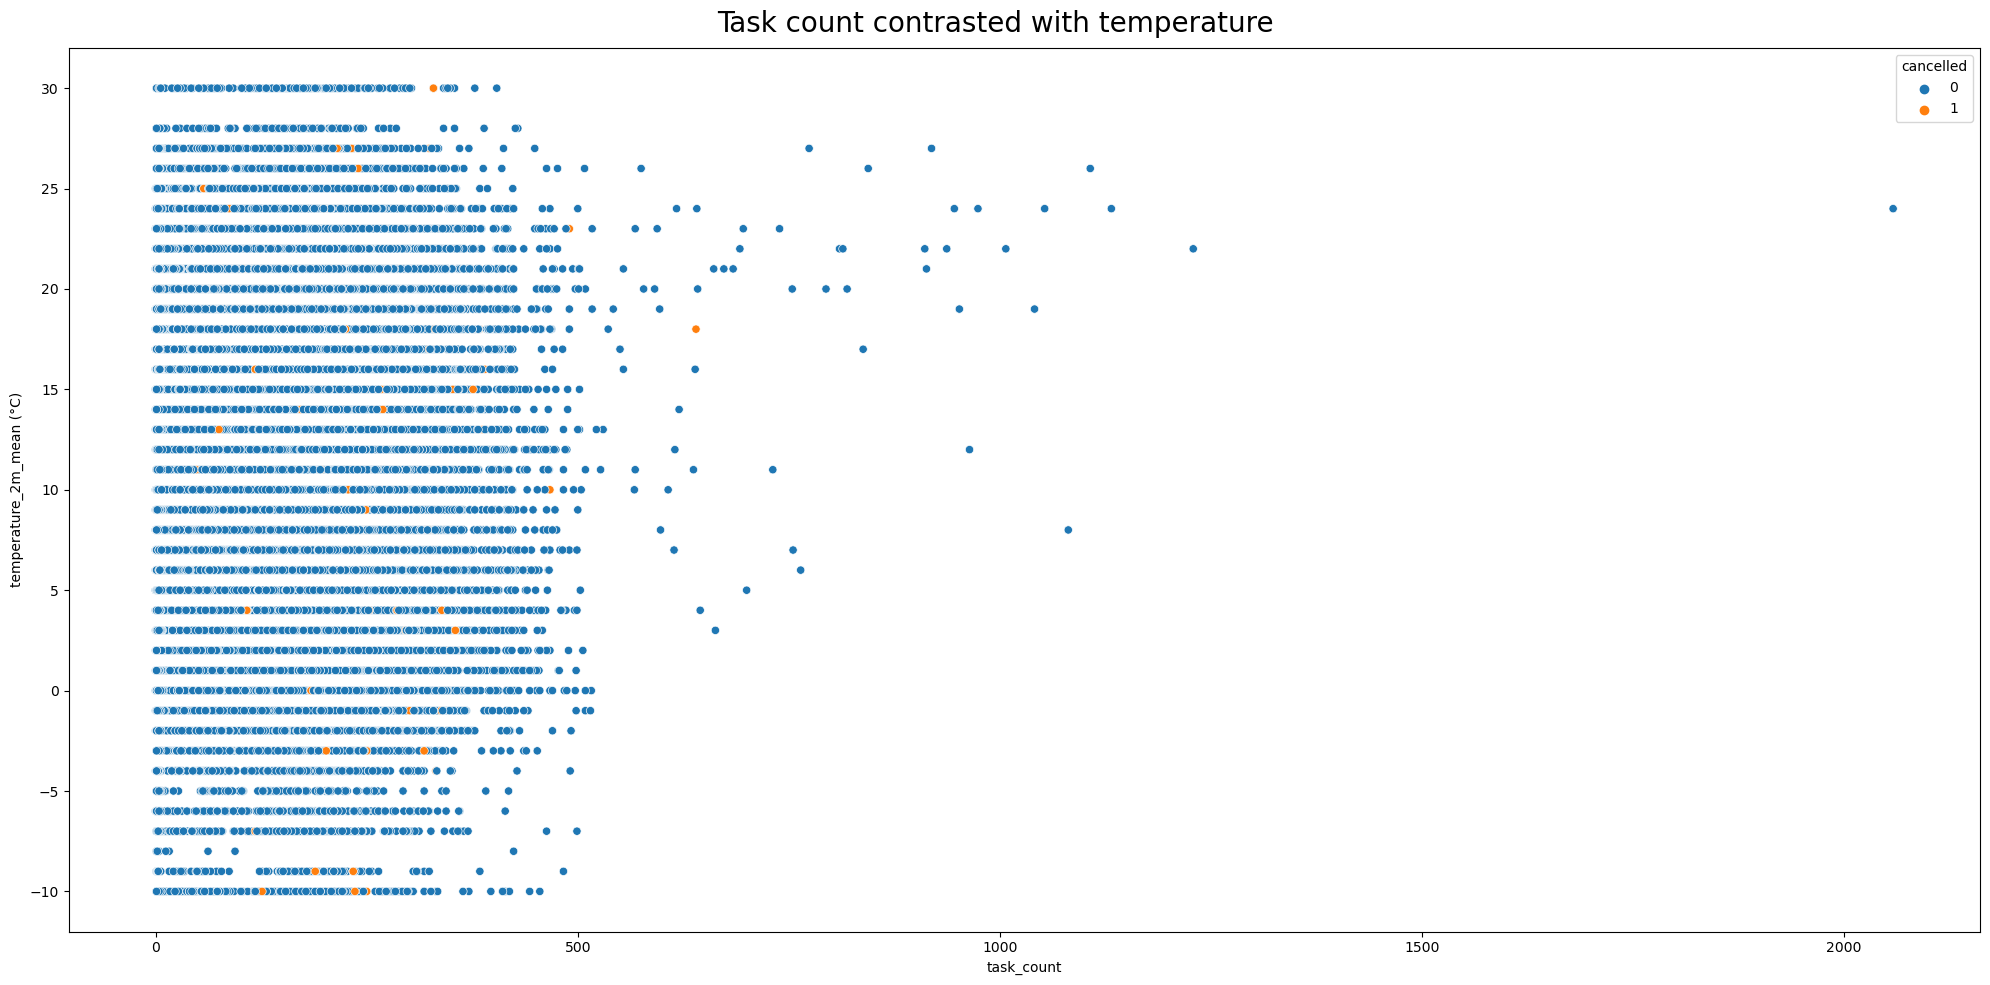

In [405]:
fig= plt.figure(figsize=(20,10))
sns.scatterplot(x='task_count', y='temperature_2m_mean (°C)', hue='cancelled', data=everything_table)
fig.suptitle('Task count contrasted with temperature', fontsize=20)
plt.tight_layout()
plt.show()

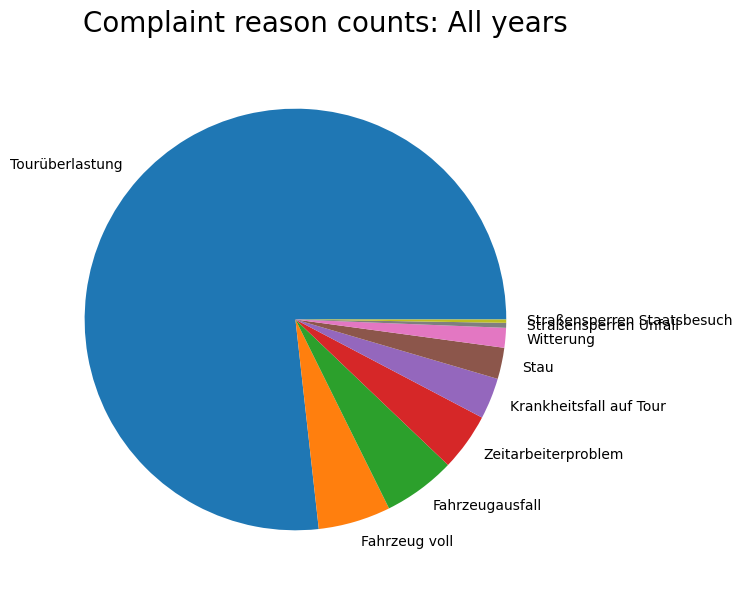

In [406]:
fig = plt.figure(figsize=(9,6))
counts = everything_table['Reklamationsuntergrund Beschreibung'].value_counts()
plt.pie(counts.values, labels = counts.index)
fig.suptitle('Complaint reason counts: All years', fontsize=20)
plt.tight_layout()
plt.show()



Reklamationsuntergrund Beschreibung
Tourüberlastung                420
Fahrzeug voll                   29
Fahrzeugausfall                 24
Zeitarbeiterproblem             21
Krankheitsfall auf Tour         14
Stau                             6
Witterung                        6
Straßensperren Unfall            1
Straßensperren Staatsbesuch      1
Name: count, dtype: int64


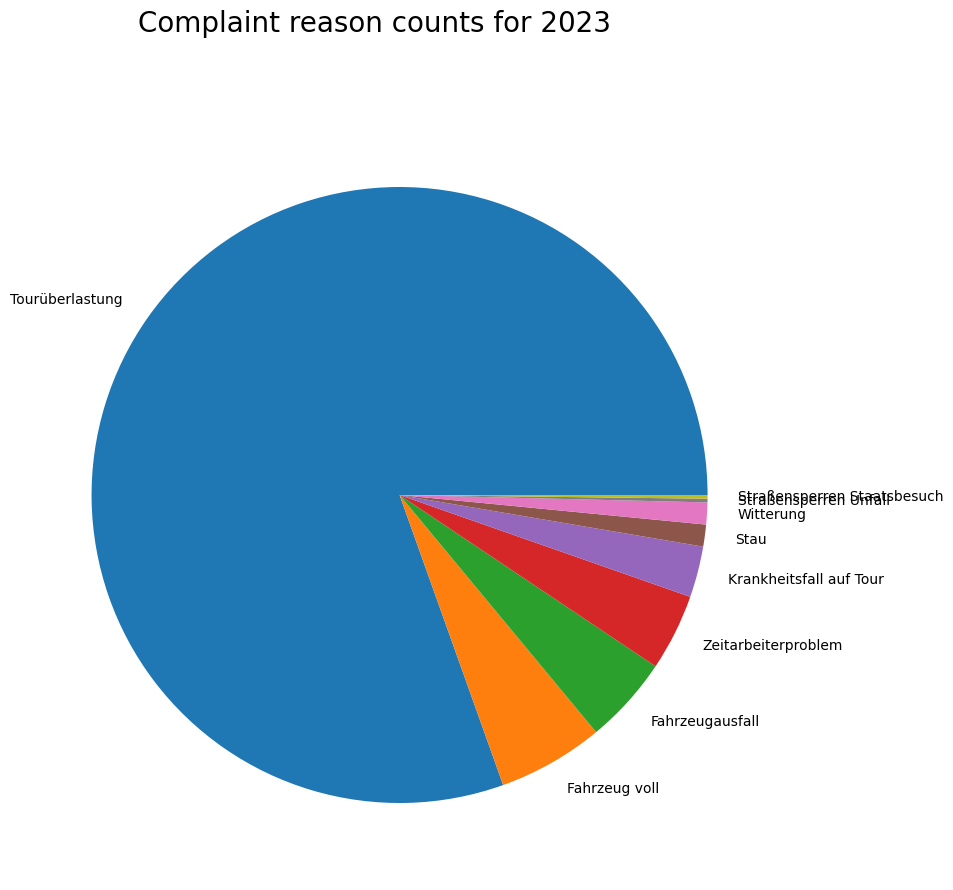

Reklamationsuntergrund Beschreibung
Tourüberlastung                188
Fahrzeugausfall                 20
Fahrzeug voll                   15
Zeitarbeiterproblem             14
Stau                            13
Krankheitsfall auf Tour         11
Witterung                        6
Straßensperren Unfall            2
Straßensperren Staatsbesuch      1
Name: count, dtype: int64


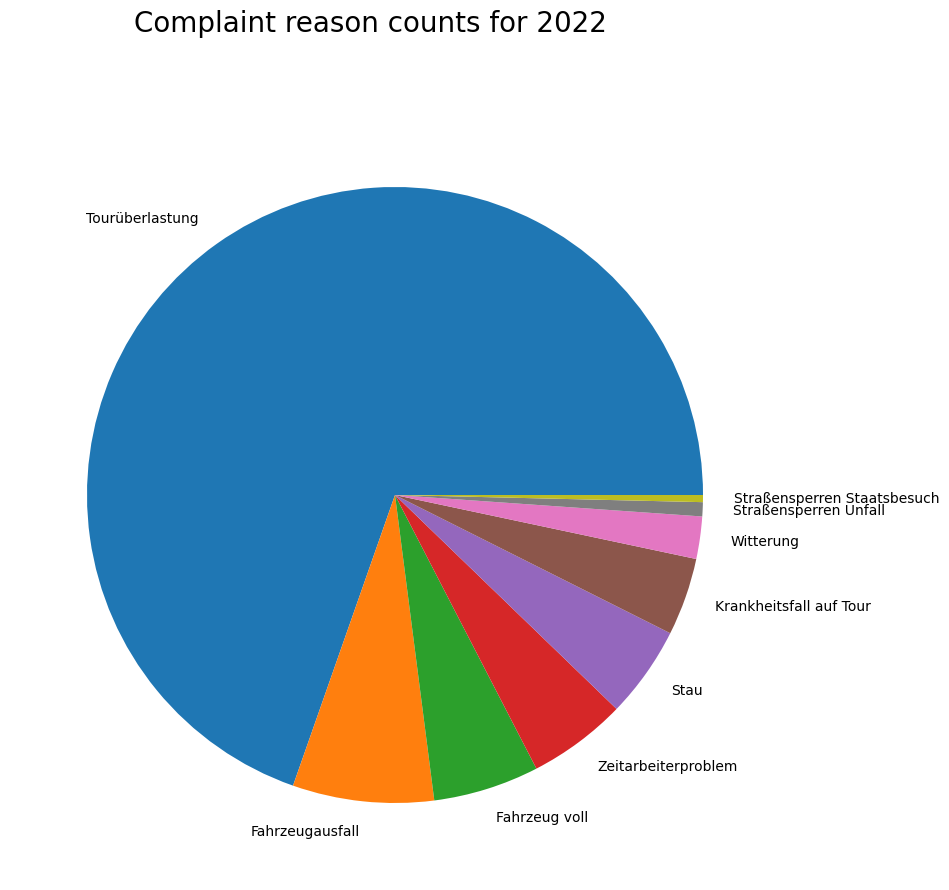

Series([], Name: count, dtype: int64)


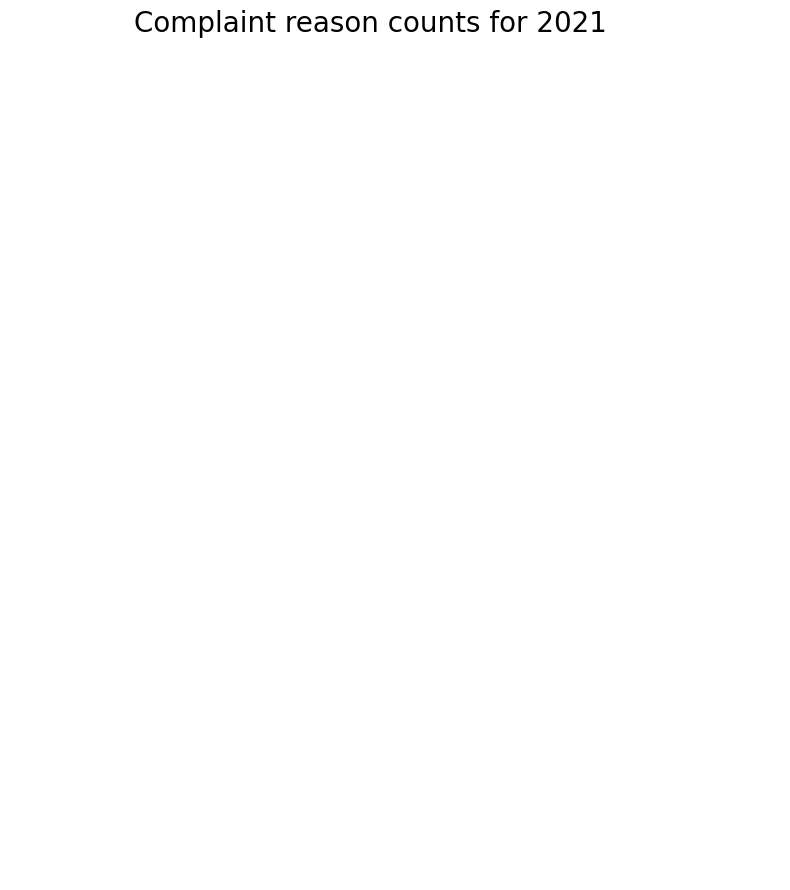

In [407]:
def boxplot_by_year():
    for val in everything_table.year.unique():
        data = everything_table[everything_table.year == val]
        fig = plt.figure(figsize=(20,10))
        print(data['Reklamationsuntergrund Beschreibung'].value_counts())
        plt.pie(data['Reklamationsuntergrund Beschreibung'].value_counts().values, labels = data['Reklamationsuntergrund Beschreibung'].value_counts().index)
        fig.suptitle(f'Complaint reason counts for {val}', fontsize=20)
        plt.show()
boxplot_by_year()
    

In [408]:
everything_table.sort_values(by = 'Einsatzdatum', ascending=False).head(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
0,79785,2023-12-31,MONU,180,TM00100,NaN,NaN,00:00:00,00:00:00,BR_MONU,2023,December,12,Sunday,31,TM,1.0,1.0,3.0,2.6,1.916667,NaN,NaN,61,6,1.70,0.00,4.0,0


In [409]:
everything_table.sort_values(by = 'Einsatzdatum', ascending=False).tail(1)

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
95348,50363,2021-01-02,MONU,64,TT00005,NaN,NaN,00:00:00,00:00:00,BR_MONU,2021,January,1,Saturday,2,TT,1.0,1.0,2.0,1.833333,21.410663,28.0,NaN,3,0,0.00,0.00,0.0,0


Reklamationsuntergrund Beschreibung
Tourüberlastung                420
Fahrzeug voll                   29
Fahrzeugausfall                 24
Zeitarbeiterproblem             21
Krankheitsfall auf Tour         14
Stau                             6
Witterung                        6
Straßensperren Unfall            1
Straßensperren Staatsbesuch      1
Name: count, dtype: int64


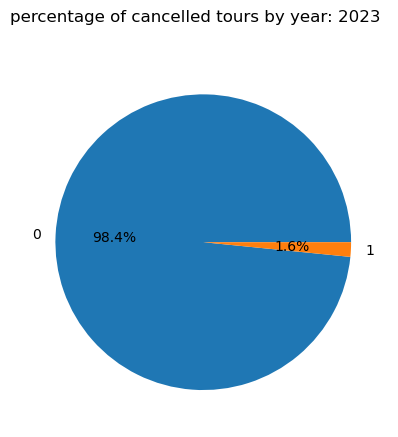

Reklamationsuntergrund Beschreibung
Tourüberlastung                188
Fahrzeugausfall                 20
Fahrzeug voll                   15
Zeitarbeiterproblem             14
Stau                            13
Krankheitsfall auf Tour         11
Witterung                        6
Straßensperren Unfall            2
Straßensperren Staatsbesuch      1
Name: count, dtype: int64


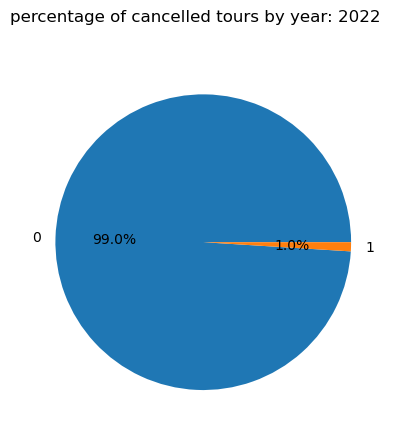

Series([], Name: count, dtype: int64)


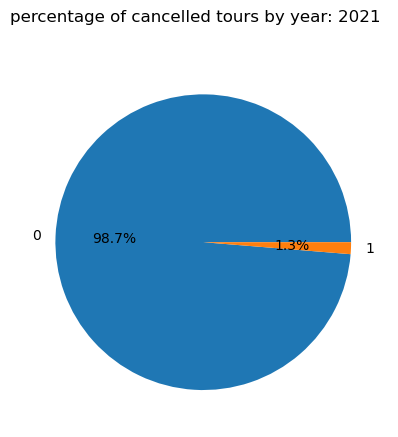

In [410]:
for val in everything_table.year.unique():
    data = everything_table[everything_table.year == val]
    print(data['Reklamationsuntergrund Beschreibung'].value_counts())
    plt.suptitle(f'percentage of cancelled tours by year: {val}')
    plt.pie(data.cancelled.value_counts().values, labels = data.cancelled.value_counts().index, autopct='%1.1f%%')
    plt.show()

In [411]:
len(everything_table)

95349

I want to get rid of tours with absurdly high Task counts

In [412]:
everything_table = everything_table[everything_table.task_count < 400]

In [413]:
len(everything_table)

93412

In [414]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,average_tasks,task_count,Reklamationsgrund,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),cancelled
1,12084,2023-12-30,MONU,134,TP00346,NaN,NaN,05:58:42,11:40:59,BR_MONU,2023,December,12,Saturday,30,TP,0.0,1.0,2.0,2.107831,159.131274,170.0,NaN,61,6,2.80,0.00,6.0,0
2,93972,2023-12-30,MONU,35,TG00022,A234593588,Tourüberlastung,05:18:53,13:22:40,BR_WESTH,2023,December,12,Saturday,30,TG,1.0,1.0,2.0,2.077632,143.213720,59.0,901.0,61,6,2.80,0.00,6.0,1
3,11265,2023-12-30,MONU,86,TM00011,NaN,NaN,05:11:20,10:36:55,BR_MONU,2023,December,12,Saturday,30,TM,0.0,1.0,2.0,2.002535,53.933673,69.0,NaN,61,6,2.80,0.00,6.0,0
4,70895,2023-12-30,MONU,20,TP00117,NaN,NaN,05:37:01,14:11:57,BR_WESTH,2023,December,12,Saturday,30,TP,1.0,1.0,3.0,2.261787,228.166244,221.0,NaN,61,6,2.80,0.00,6.0,0
5,13043,2023-12-30,MONU,36,TG00030,NaN,NaN,05:25:43,13:23:18,BR_WESTH,2023,December,12,Saturday,30,TG,0.0,1.0,2.0,2.087649,149.538770,165.0,NaN,61,6,2.80,0.00,6.0,0


In [415]:
everything_table['task_difference'] = everything_table.task_count - everything_table.average_tasks

In [416]:
everything_table['employee_difference'] = everything_table.employee_count - everything_table.average_employee_count

In [417]:
everything_table.columns

Index(['%TOURNR', 'Einsatzdatum', 'Betriebsstätte', '%Rahmentour',
       'Rahmentourcode', 'Belegnr.', 'Reklamationsuntergrund Beschreibung',
       'Startuhrzeit', 'Endeuhrzeit', 'Ausgangspunkt', 'year', 'month',
       'month_number', 'day', 'day_number', 'rubbish_type',
       'Zeitarbeiter_Flag', 'Ressource.Erster Fahrer', 'employee_count',
       'average_employee_count', 'average_tasks', 'task_count',
       'Reklamationsgrund', 'weather_code (wmo code)',
       'temperature_2m_mean (°C)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'precipitation_hours (h)', 'cancelled', 'task_difference',
       'employee_difference'],
      dtype='object')

In [ ]:
everything_table = everything_table.drop(columns=['Reklamationsgrund'])

In [424]:
everything_table = everything_table[['%TOURNR',
                            'Einsatzdatum',
                            'Betriebsstätte',
                            '%Rahmentour',
                            'Rahmentourcode',
                            'Belegnr.',
                            'Reklamationsuntergrund Beschreibung',
                            'Startuhrzeit',
                            'Endeuhrzeit',
                            'Ausgangspunkt',
                            'year',
                            'month',
                            'month_number',
                            'day',
                            'day_number',
                            'weather_code (wmo code)',
                            'temperature_2m_mean (°C)',
                            'rain_sum (mm)',
                            'snowfall_sum (cm)',
                            'precipitation_hours (h)',
                            'rubbish_type',
                            'Zeitarbeiter_Flag',
                            'Ressource.Erster Fahrer',
                            'employee_count',
                            'average_employee_count',
                            'employee_difference',
                            'task_count',
                            'average_tasks',
                            'task_difference',
                            'cancelled']]

I want to drop Reklamationsgrund as its encoded in Binary format in cancelled column

In [429]:
everything_table['Ressource.Erster Fahrer'].value_counts(dropna=False)

Ressource.Erster Fahrer
1.0    93354
0.0       38
NaN       20
Name: count, dtype: int64

In [425]:
everything_table.head()

,%TOURNR,Einsatzdatum,Betriebsstätte,%Rahmentour,Rahmentourcode,Belegnr.,Reklamationsuntergrund Beschreibung,Startuhrzeit,Endeuhrzeit,Ausgangspunkt,year,month,month_number,day,day_number,weather_code (wmo code),temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),rubbish_type,Zeitarbeiter_Flag,Ressource.Erster Fahrer,employee_count,average_employee_count,employee_difference,task_count,average_tasks,task_difference,cancelled
1,12084,2023-12-30,MONU,134,TP00346,NaN,NaN,05:58:42,11:40:59,BR_MONU,2023,December,12,Saturday,30,61,6,2.80,0.00,6.0,TP,0.0,1.0,2.0,2.107831,-0.107831,170.0,159.131274,10.868726,0
2,93972,2023-12-30,MONU,35,TG00022,A234593588,Tourüberlastung,05:18:53,13:22:40,BR_WESTH,2023,December,12,Saturday,30,61,6,2.80,0.00,6.0,TG,1.0,1.0,2.0,2.077632,-0.077632,59.0,143.213720,-84.213720,1
3,11265,2023-12-30,MONU,86,TM00011,NaN,NaN,05:11:20,10:36:55,BR_MONU,2023,December,12,Saturday,30,61,6,2.80,0.00,6.0,TM,0.0,1.0,2.0,2.002535,-0.002535,69.0,53.933673,15.066327,0
4,70895,2023-12-30,MONU,20,TP00117,NaN,NaN,05:37:01,14:11:57,BR_WESTH,2023,December,12,Saturday,30,61,6,2.80,0.00,6.0,TP,1.0,1.0,3.0,2.261787,0.738213,221.0,228.166244,-7.166244,0
5,13043,2023-12-30,MONU,36,TG00030,NaN,NaN,05:25:43,13:23:18,BR_WESTH,2023,December,12,Saturday,30,61,6,2.80,0.00,6.0,TG,0.0,1.0,2.0,2.087649,-0.087649,165.0,149.538770,15.461230,0


In [445]:
percentage_cancelled = everything_table.groupby(['Rahmentourcode', 'year'])['cancelled'].sum().reset_index()

In [448]:
percentage_cancelled.sort_values(by='cancelled', ascending=False).head()

,Rahmentourcode,year,cancelled
106,TG00033,2023,66
327,TP00321,2021,56
83,TG00022,2023,52
301,TP00311,2022,43
105,TG00032,2023,33


lets see what number of cancellations had the main driver missing

In [449]:
missing_driver_data = everything_table[everything_table['Ressource.Erster Fahrer'] != 1.0]

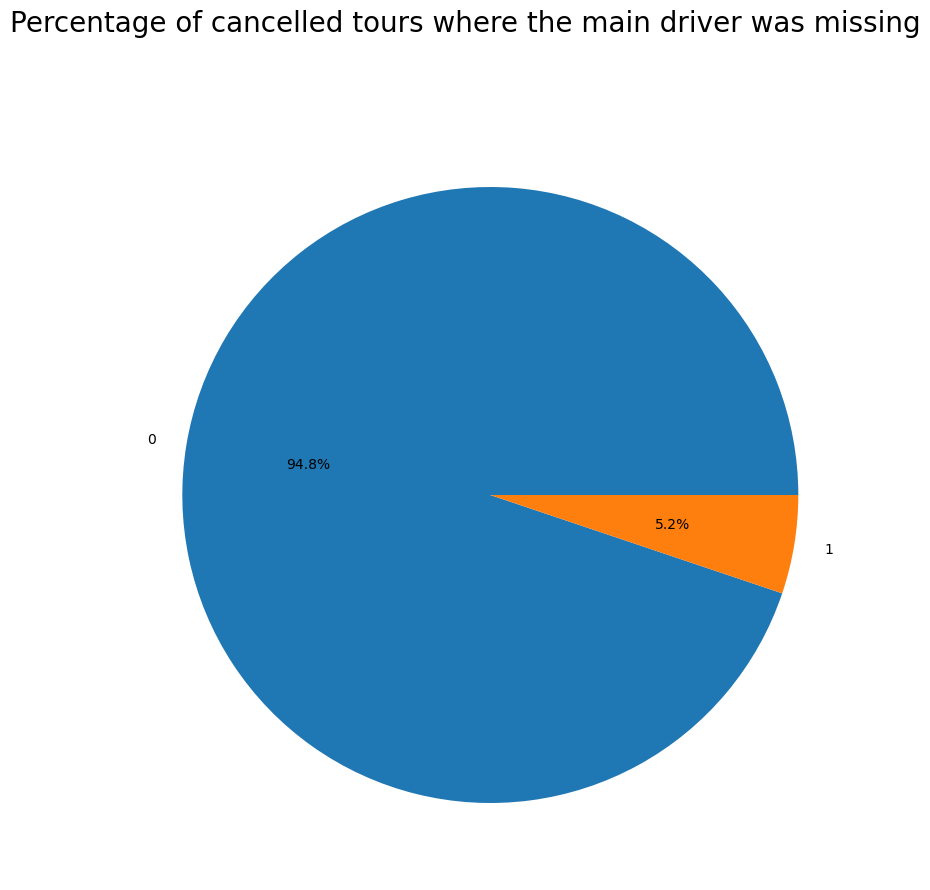

In [454]:
#lets see what percentage of thesee tours were cancelled to get some insight on if the driver missing causes a cancellation
#Tours missing the main driver have a 5time higher chance of being cancelled
fig = plt.figure(figsize=(20,10))
plt.suptitle('Percentage of cancelled tours where the main driver was missing', fontsize=20)
plt.pie(missing_driver_data.cancelled.value_counts().values, labels = missing_driver_data.cancelled.value_counts().index, autopct='%1.1f%%')
plt.show()

In [464]:
#lets fill the NA values in zeitarbeiter_flag with 0
everything_table['Zeitarbeiter_Flag'] = everything_table['Zeitarbeiter_Flag'].fillna(0)

In [465]:
possible_values_zeitarbeiter_flag = everything_table.Zeitarbeiter_Flag.unique()

In [468]:
possible_values_zeitarbeiter_flag =sorted(possible_values_zeitarbeiter_flag)

cancelled
0    58552
1      624
Name: count, dtype: int64


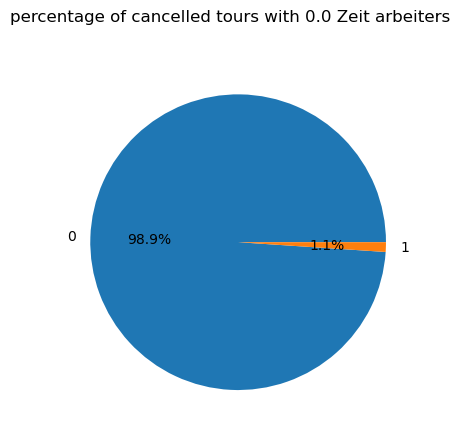

cancelled
0    30791
1      550
Name: count, dtype: int64


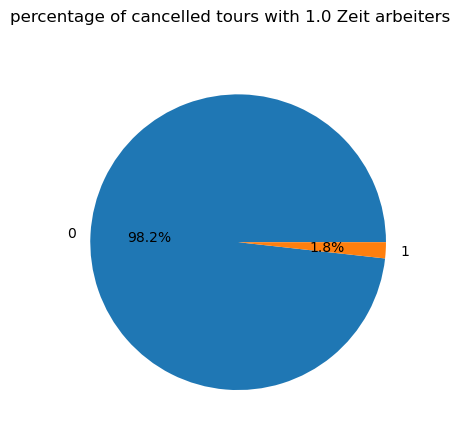

cancelled
0    2274
1      52
Name: count, dtype: int64


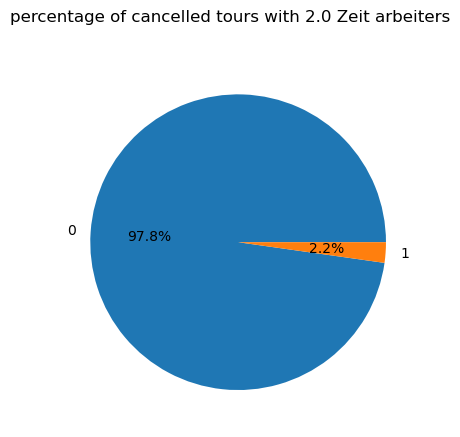

cancelled
0    316
1      1
Name: count, dtype: int64


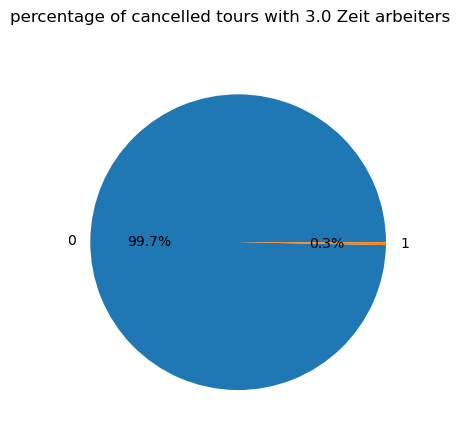

cancelled
0    179
1      3
Name: count, dtype: int64


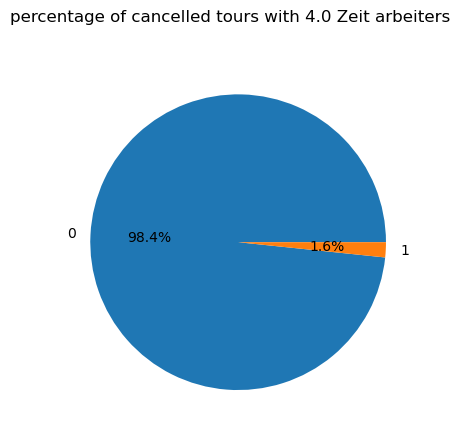

cancelled
0    63
Name: count, dtype: int64


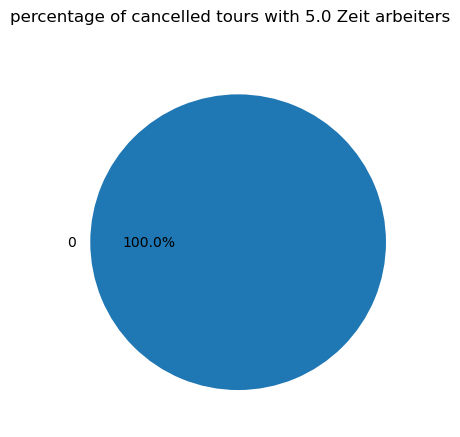

cancelled
0    7
Name: count, dtype: int64


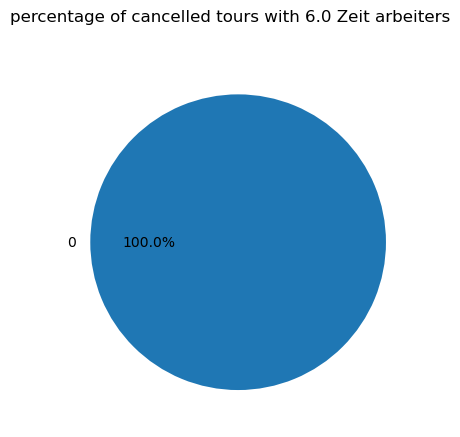

In [470]:
#lets see if the number of Zeit arbeiters has an impact on the cancellation rate
for val in possible_values_zeitarbeiter_flag:
    data = everything_table[everything_table.Zeitarbeiter_Flag == val]
    print(data['cancelled'].value_counts(dropna=False))
    plt.suptitle(f'percentage of cancelled tours with {val} Zeit arbeiters')
    plt.pie(data.cancelled.value_counts().values, labels = data.cancelled.value_counts().index, autopct='%1.1f%%')
    plt.show()